In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
documents = ["This Little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is Incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

In [3]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(documents)

In [4]:
vectorizer.get_feature_names()

C:\Users\shahv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['100',
 'app',
 'belly',
 'best',
 'came',
 'cat',
 'chrome',
 'climbing',
 'eating',
 'extension',
 'face',
 'feedback',
 'google',
 'impressed',
 'incredible',
 'key',
 'kitten',
 'kitty',
 'little',
 'map',
 'merley',
 'ninja',
 'open',
 'photo',
 'play',
 'promoter',
 'restaurant',
 'smiley',
 'squooshy',
 'tab',
 'taken',
 'translate',
 've']

In [5]:
X.getrow(0).toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.40824829,
        0.        , 0.        , 0.        , 0.40824829, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.40824829, 0.40824829, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.40824829,
        0.        , 0.40824829, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [18]:
X

<8x33 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [6]:
true_k = 2
model = KMeans(n_clusters = true_k, init='k-means++',max_iter = 100 , n_init = 1)
model.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [7]:
print("Top terms per cluster :")
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind]);
    print
print("\n")
print("Prediction")

Top terms per cluster :
Cluster 0:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten
Cluster 1:
 google
 feedback
 map
 app
 impressed
 incredible
 translate
 key
 extension
 chrome


Prediction


C:\Users\shahv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
V = vectorizer.transform(["chrome brower to open."])
prediction = model.predict(V)
print(prediction)

[1]


In [9]:
Y = vectorizer.transform(["My cat is hungry"])
prediction = model.predict(Y)
print(prediction)

[0]


In [10]:
def tag_cluster(doc):
    vec = vectorizer.transform([doc])
    return model.predict(vec)[0]

In [11]:
clusters =[tag_cluster(doc) for doc in documents]

In [12]:
clusters

[0, 0, 1, 1, 0, 0, 1, 1]

In [13]:
import pandas as pd
df = pd.DataFrame(documents,clusters).reset_index()

In [14]:
df

,index,0
0,0,This Little kitty came to play when I was eati...
1,0,Merley has the best squooshy kitten belly.
2,1,Google Translate app is Incredible.
3,1,If you open 100 tab in google you get a smiley...
4,0,Best cat photo I've ever taken.
5,0,climbing ninja cat.
6,1,Impressed with google map feedback.
7,1,Key promoter extension for Google Chrome.


In [15]:
import seaborn as sns

In [16]:
wcss = []

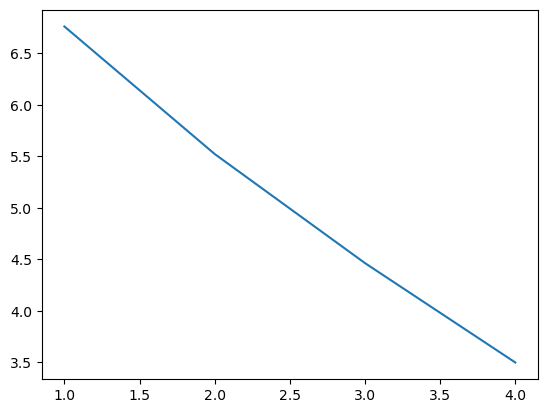

In [17]:
for i in range(1,5):
    clustering = KMeans(n_clusters = i,init='k-means++',random_state=42)
    clustering.fit(X)
    wcss.append(clustering.inertia_)
ks = [1,2,3,4]
sns.lineplot(x = ks,y =wcss);